In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def oneline(x,rad,point):
    a=point[1]-rad*point[0]
    return rad*x+a
def twoline(x,pointa,pointb):
    rad=(pointa[1]-pointb[1])/(pointa[0]-pointb[0])
    print(rad)
    a=pointb[1]-rad*pointb[0]
    return rad*x+a

{36: array([ 0.48179893,  4.3959718 ]), 70: array([ 2.31446307,  3.374987  ]), 7: array([ 2.59017016, -5.52265035]), 72: array([ 5.70928255,  4.96404466]), 9: array([ 2.68034388,  0.26835185]), 45: array([ 0.94291375, -5.43445742]), 16: array([ 3.76290153, -2.03091517]), 81: array([ 0.94828519,  0.75601306]), 18: array([ 3.15071999,  2.38294871]), 54: array([ 3.69987701,  4.46642332]), 25: array([ 4.06328771,  0.94429372]), 90: array([ 1.6983677 , -2.08966931]), 27: array([ 5.25292609,  5.53656921]), 61: array([ 0.03596156, -2.84396626]), 63: array([ 2.09939861, -3.91527208])}
[-8.2006921398999992, 1.9093078600999993]
-0.415150886106
-0.415150886106


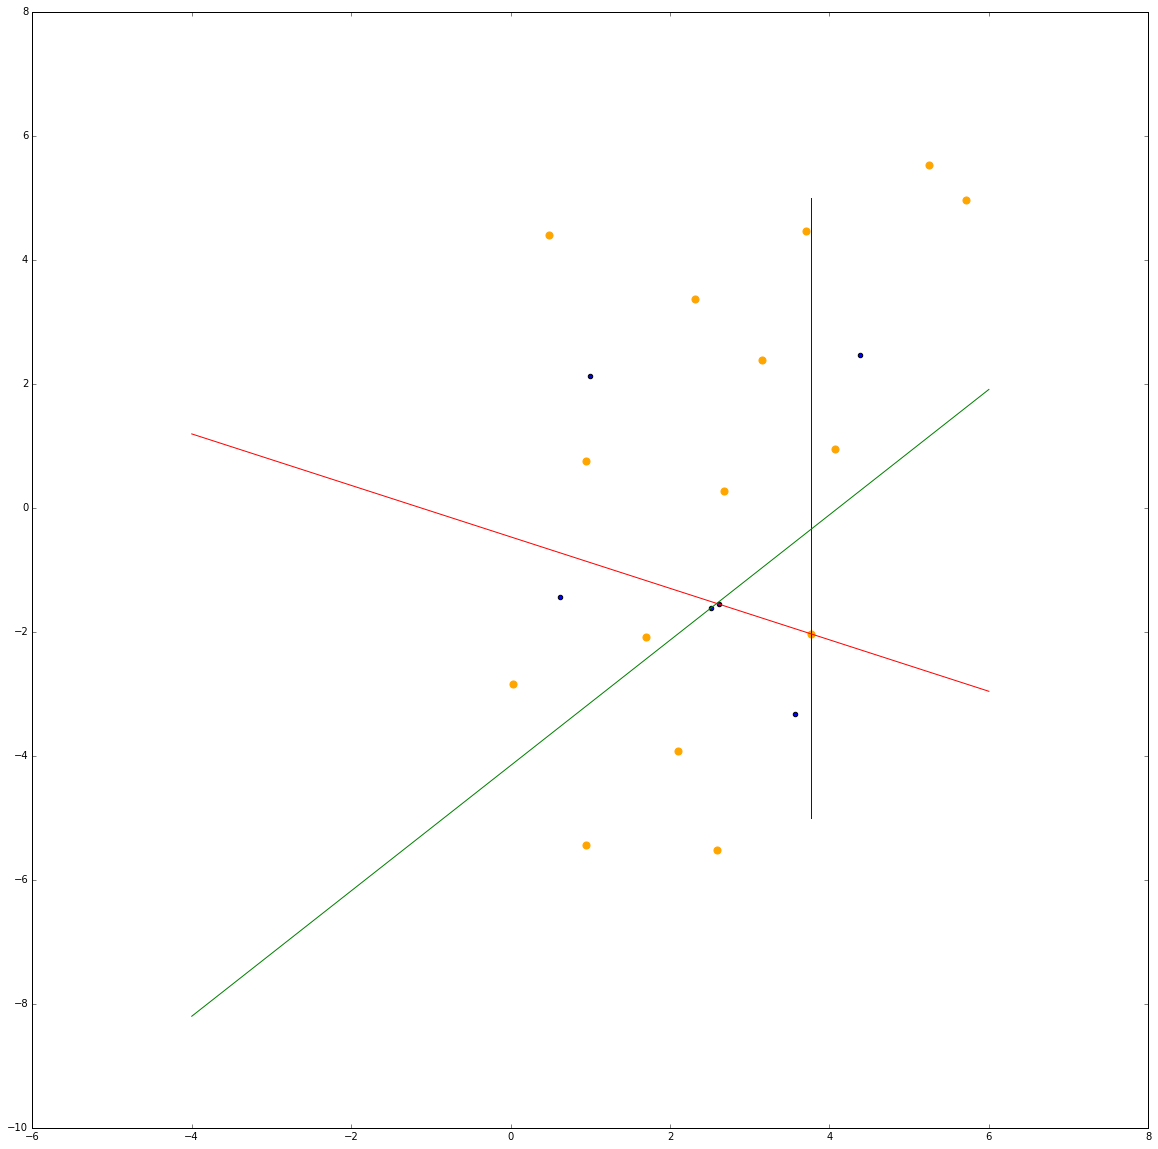

In [40]:
lName='datasets/Landmark_Groundtruth.dat'
bName='datasets/Barcodes.dat'


namesLand=" Subject#    x[m]    y[m]    xstd-dev[m]    ystd-dev[m]".split()
land=pd.read_csv(lName,sep=r"\s*",skiprows=4,names=namesLand,engine='python')

namesBar=" Subject#    Barcode#".split()
bar=pd.read_csv(bName,sep=r"\s*",skiprows=4,names=namesBar,engine='python')


land=np.array(land.values)
bar=np.array(bar.values)
barDik={int(row[0]):int(row[1]) for row in bar}
landDik={barDik[int(row[0])]:row[1:3] for row in land}
lanList=np.array(list(landDik.values()))
print(landDik)

one=np.linspace(-4,6,2)
print([ oneline(x,1.011,[ 2.51423090,-1.6148047]) for x in one ])
plt.figure(figsize=(20,20))
plt.plot([3.76290153,3.76290153],[-5,5])
plt.plot(one,[ oneline(x,1.011,[ 2.51423090,-1.6148047]) for x in one ],'g-')
plt.plot(one,[ twoline(x,landDik[16],[2.61488960  ,-1.554317]) for x in one ],'r-')


plt.scatter(lanList[:,0],lanList[:,1],color='orange',s=50)

plt.scatter([3.57323240 ,0.62382000, 4.38279830, 0.99186170 ,2.51423090, 2.61488960  ],
           [-3.33283870 ,-1.43234340  ,2.46284470 ,2.12413610,-1.61480470,-1.554317])

In [48]:
1.65203651892-1.0114
math.atan2(landDik[16][1],landDik[16][0])+0.019,math.atan2(-1.554317,2.61488960  )
math.atan2( 0.26835185,2.68034388)

0.09978591920715031

In [11]:
def triM(*args):
    startM=args[0]
    for m in args[1:]:
        startM=startM.dot(m)
    return startM

h=np.array([[ 0.38097784, -0.92458417 , 0.0],
 [ 0.30783465,  0.12684425 ,-1. ]])
r=np.eye(2)*1e-3
p=np.eye(3)*1e-9
triM(p,h.T,np.linalg.inv(triM(h,p,h.T)+r))

array([[  3.80977459e-07,   3.07834308e-07],
       [ -9.24583245e-07,   1.26844109e-07],
       [ -5.57135474e-21,  -9.99998889e-07]])

In [1]:
import numpy as np
bins=np.linspace(5,11,4)
a=[2,5,6,7,15,9,8.6,9.001,9.3,10,346432]
for i in a:
    print(np.ceil( np.clip( ((i-5)/2),0,3)))
bins

0.0
0.0
1.0
1.0
3.0
2.0
2.0
3.0
3.0
3.0
3.0


array([  5.,   7.,   9.,  11.])

In [3]:
Rerror=[1,2,0]
invZO=lambda a: a+(1-a)-(1*a)
howManyM=3
RCol=np.array([1,2,3,4,4,5]).reshape(6,1)

print(np.eye(2*(howManyM))*RCol)

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  5.]]
